In [17]:
import glob
import pandas as pd
from ML2_lib import RV_SGDAve
from ML2_lib import loss
from ML2_lib import plot_set
import numpy as np
import datetime
import pickle

In [20]:

files = glob.glob("../exp/simulation/remote_exp/remote_save_result/Rosenbrock_2d_trajectory10:11:17:29:54/*")
for file in files:
    with open(file, mode="rb") as f:
        d = pickle.load(f)
        print(d)

[array([[[-10.        , -10.        ],
        [ -9.55997727,  -9.9780001 ],
        [ -9.17231552,  -9.95772547],
        ...,
        [ -9.32989668,  26.58605615],
        [ -9.10423826,  26.59814852],
        [ -8.8992301 ,  26.60940684]]]), array([[[-10.        , -10.        ],
        [ -9.55997968,  -9.9779995 ],
        [ -9.17231579,  -9.95772405],
        ...,
        [ -2.88570078,  21.94715735],
        [ -2.90141475,  21.94443326],
        [ -2.91710552,  21.9417279 ]],

       [[-10.        , -10.        ],
        [ -9.559979  ,  -9.97799965],
        [ -9.17231631,  -9.95772469],
        ...,
        [ -6.52660271,  20.99646735],
        [ -6.47019829,  21.00078718],
        [ -6.41619109,  21.00496207]]]), array([[[-10.        , -10.        ],
        [ -9.55997989,  -9.97799962],
        [ -9.17231596,  -9.95772727],
        ...,
        [  5.04520435,  12.46685167],
        [  5.01898579,  12.46944801],
        [  4.99343608,  12.47199295]],

       [[-10.        , -1

In [21]:
d[0]

array([[[ 0.00000000e+00,  0.00000000e+00],
        [ 1.74778984e-04, -8.92605754e-02],
        [ 6.46933410e-03, -7.46827427e-02],
        ...,
        [ 5.92690696e-01,  3.51954919e-01],
        [ 5.97738412e-01,  3.56244451e-01],
        [ 6.02831653e-01,  3.59862849e-01]]])

array([[18620.22063557,  5279.75740173,    52.18256807,   848.83925925,
         6760.09019376, 12674.49923307],
       [32661.23020647,  5715.13054216,    50.08520788,   806.322949  ,
         6758.91440938, 12670.93063159],
       [30516.03428175,  5569.88914296,    50.41620655,   847.55798714,
         6740.86847864, 12669.52633264],
       [19714.34309263,  7905.54199071,    49.04636648,   833.89649578,
         6588.96019703, 12669.97482775],
       [28053.12905686,  7887.99724921,    48.76979378,   840.85412723,
         6774.97590554, 12670.29809291],
       [30751.63190867,  6736.71899008,    47.81466396,   874.45089451,
         6930.13830521, 12670.04239747],
       [18554.84562103,  7814.15770459,    51.971551  ,   849.8568195 ,
         6792.69727204, 12574.06251862],
       [25818.82705357,  6246.89281865,    50.24248731,   836.71840308,
         6747.71351114, 12680.98946454],
       [29367.05992805,  5622.5320318 ,    52.05311041,   833.91474772,
         6667.2928539 , 

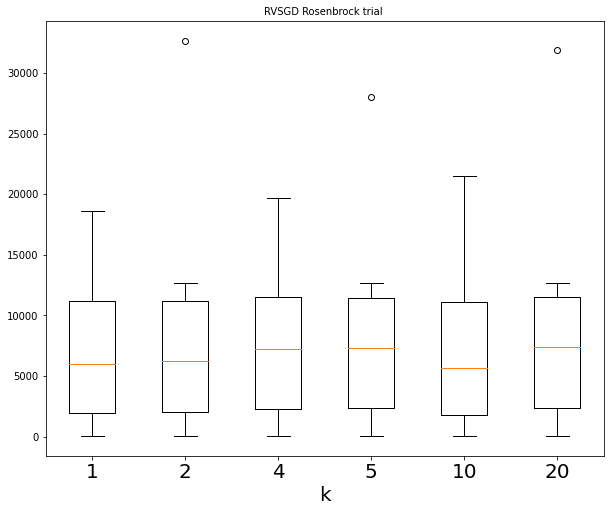

In [13]:
title = f"RVSGD Rosenbrock trial "
k_list = [0, 1, 3, 4, 9, 19]
k_string = [f"{i + 1}" for i in k_list]
result = df.values.T

plot_set.box_plot_k(result, k_list, k_string, title)

array([[18620.22063557,  5279.75740173,    52.18256807,   848.83925925,
         6760.09019376, 12674.49923307],
       [32661.23020647,  5715.13054216,    50.08520788,   806.322949  ,
         6758.91440938, 12670.93063159],
       [30516.03428175,  5569.88914296,    50.41620655,   847.55798714,
         6740.86847864, 12669.52633264],
       [19714.34309263,  7905.54199071,    49.04636648,   833.89649578,
         6588.96019703, 12669.97482775],
       [28053.12905686,  7887.99724921,    48.76979378,   840.85412723,
         6774.97590554, 12670.29809291],
       [30751.63190867,  6736.71899008,    47.81466396,   874.45089451,
         6930.13830521, 12670.04239747],
       [18554.84562103,  7814.15770459,    51.971551  ,   849.8568195 ,
         6792.69727204, 12574.06251862],
       [25818.82705357,  6246.89281865,    50.24248731,   836.71840308,
         6747.71351114, 12680.98946454],
       [29367.05992805,  5622.5320318 ,    52.05311041,   833.91474772,
         6667.2928539 , 